# Micromodel Properties (cont.)
---
This notebook will show some pore analysis using PoreSpy on a generated example micromodel (from example 2).

**Developed by**:
Aramy Truong, Postbachelors Research Associate - Terrestrial and Atmospheric Processes - Pacific Northwest National Laboratory, Richland, WA, USA.

**Mentors**:
Arunima Bhattacharjee and
Maruti K. Mudunuru

In [1]:
# Importing necessary libraries
from pore2chip import metrics, filter_im
import cv2 as cv
import os
import copy
import numpy as np
from matplotlib import pyplot as plt

# PoreSpy for porosity analysis
import porespy as ps
from edt import edt
ps.visualization.set_mpl_style()

path = os.getcwd()

%matplotlib widget
%load_ext autoreload
%autoreload 2

## Loading the image (Micromodel from example 2)
---
Here, we load a raster image of our micromodel design. Again, this design could be generated from a previous notebook.

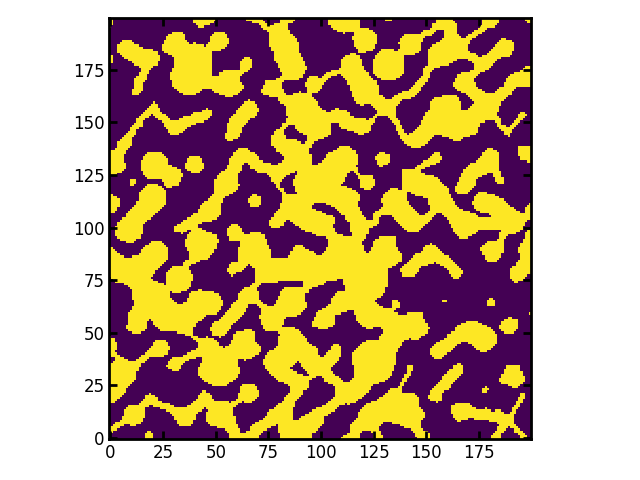

In [2]:
model_path = os.path.dirname(path) + r'\example_outputs\\network1.png'
micromodel_filtered = filter_im.read_and_filter(model_path, invert=True)
fig, ax = plt.subplots()
ax.imshow(micromodel_filtered)

## Tortuosity
---
Here, we can find the tortuosity of the micromodel with PoreSpy. NOTE: The generated micromodel must connect from one end to the other, on the axis in which you are doing the tortuosity analysis. There will be a feature in the future to force end-tp-end connectivity of the Pore2Chip micromodel.

[11:47:25] WARNING  Found non-percolating regions, were filled to percolate                              ]8;id=58552;file://c:\Users\truo663\AppData\Local\Programs\Python\Python38\lib\site-packages\porespy\simulations\_dns.py\_dns.py]8;;\:]8;id=521165;file://c:\Users\truo663\AppData\Local\Programs\Python\Python38\lib\site-packages\porespy\simulations\_dns.py#74\74]8;;\

――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Results of tortuosity_fd generated at Wed May 22 11:47:26 2024
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
im                        Array of size (200, 200)
tortuosity                5.6817886640077955
formation_factor          16.795118723049942
original_porosity         117.472125
effective_porosity        0.3383
concentration             Array of size (200, 200)
sys                       (<13532x13532 sparse matrix of type '<class 'numpy.float64'>'
	with 63276 stored elements in COOrdinate format>, array([3.69287615, 3.69287615, 3.69287615, ..., 0.        , 0.        ,
       0.        ]))
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――


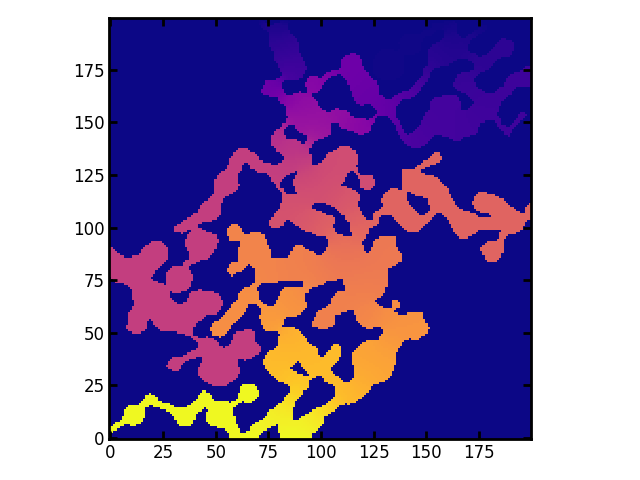

In [3]:
tort = ps.simulations.tortuosity_fd(micromodel_filtered, axis=0)
print(tort)

fig, ax = plt.subplots()
ax.imshow(tort.concentration, cmap=plt.cm.plasma)

## Drainage Simulations
---
Some examples of drawinage simulations using PoreSpy on the micromodel is shown below. Note that these simulations can vary and depend on the largest pore network that connects the design from top to bottom. To ensure connectivity from top to bottom, use the ```center_channel``` parameter in the generate function. Any unconnected sites will be discarded in the simulation.

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Results of drainage generated at Wed May 22 12:11:04 2024
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
im_satn                   Array of size (200, 200)
im_pc                     Array of size (200, 200)
im_trapped                None
pc                        Array of size (21,)
snwp                      [0.0, 0.00700059695012753, 0.009117056493189342, 0.017799967439083953, 0.019482281434851034, 0.058555380691376786, 0.10110164432626038, 0.10240408096814457, 0.36213165463721714, 0.3811797905247734, 0.3857925869647799, 0.3862810007054865, 0.40901937374504804, 0.5551636186031367, 0.6110055896239214, 0.6124708308460411, 0.6156726542573397, 0.6496445433331525, 0.7776089433982742, 0.7803223530688663, 0.7803223530688663]
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――


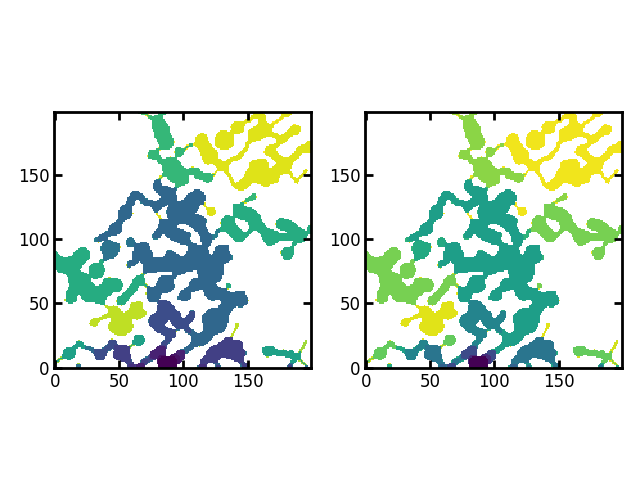

In [6]:
voxel_size = 1e-4
dt = edt(micromodel_filtered)
pc = -2*0.072*np.cos(np.deg2rad(180))/(dt*voxel_size)
inlets = np.zeros_like(micromodel_filtered)
inlets[0, ...] = True
drn = ps.simulations.drainage(pc=pc, im=micromodel_filtered, inlets=inlets, voxel_size=voxel_size)
print(drn)
fig, ax = plt.subplots(1, 2)
ax[0].imshow(drn.im_pc/micromodel_filtered, origin='lower', interpolation='none')
ax[1].imshow(np.log10(drn.im_pc), origin='lower', interpolation='none')

Now we can plot the Capillary Pressures extracted from the simulation.

Text(0, 0.5, 'Non-wetting Phase Saturation')

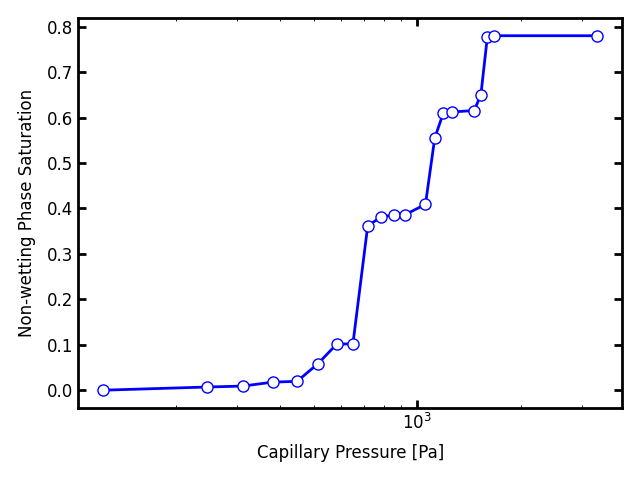

In [7]:
fig, ax = plt.subplots()

ax.semilogx(drn.pc, drn.snwp, 'b-o')
ax.set_xlabel('Capillary Pressure [Pa]')
ax.set_ylabel('Non-wetting Phase Saturation')